##Decision Trees #CodeDaniel

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline


**These are Python library imports commonly used for data analysis and visualization:**
 
 **numpy** is a library for scientific computing in Python that provides support for large, multi-dimensional arrays and matrices, as well as a large collection of high-level mathematical functions to operate on these arrays.

** pandas** is a library that provides data structures for efficient data manipulation and analysis. It allows you to read, write, and manipulate tabular data, such as CSV files or SQL tables.

**matplotlib** is a plotting library for Python that provides a variety of visualization tools for creating static, animated, and interactive visualizations in Python.

**seaborn** is a data visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics.

**sklearn.metrics.plot_confusion_matrix** is a function from the scikit-learn library that allows you to plot a confusion matrix, which is a table that summarizes the performance of a classification algorithm. It is commonly used to evaluate the performance of a machine learning model.

**%matplotlib inline** is a magic command that allows you to display plots inline in Jupyter notebooks or IPython. It is not necessary when using matplotlib in other environments, such as scripts or the Python shell.


In [7]:
datapath = 'https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/breastCancer.csv'
data = pd.read_csv(datapath)

Importing the Dataset

In [8]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


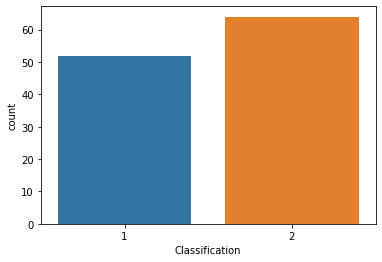

In [10]:
x = data['Classification']
ax = sns.countplot(x=x, data=data)

This is a Python code snippet that creates a countplot using the seaborn library:
x is a string that represents the column name of the variable to be counted in the dataset.
data is a pandas dataframe that contains the dataset

The code creates a seaborn countplot using sns.countplot(x=x, data=data). It sets the x parameter to the x variable and the data parameter to the data dataframe. A countplot is a type of barplot that displays the number of occurrences of each unique value in a categorical variable. It is useful for visualizing the distribution of data across different categories. The resulting plot will show a bar for each unique value of x, representing the number of occurrences of that value in the dataset.

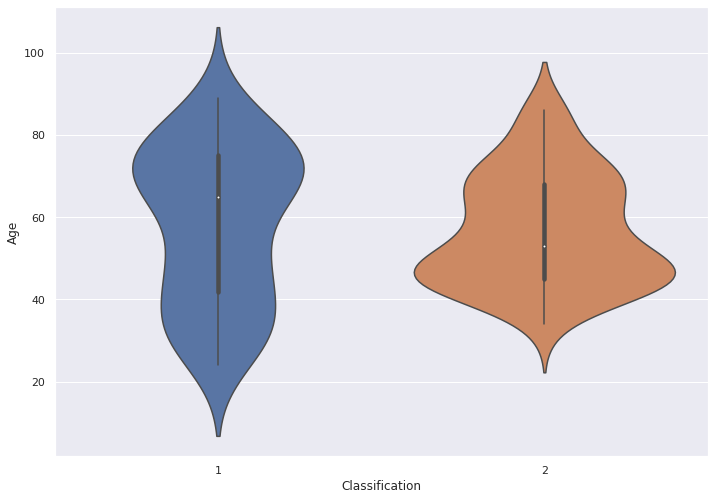

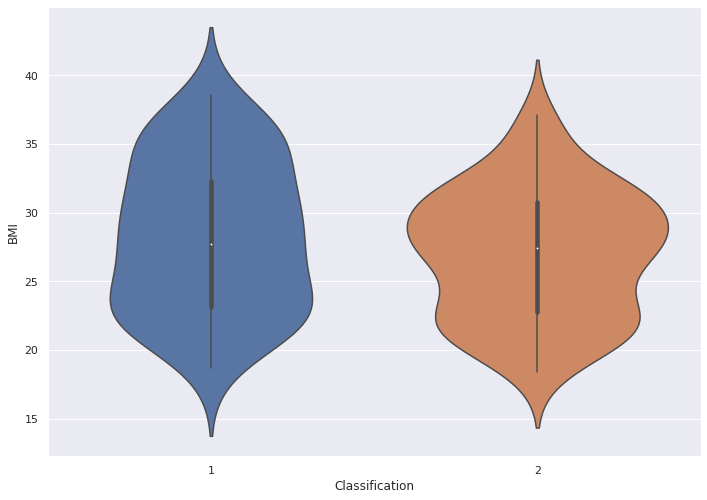

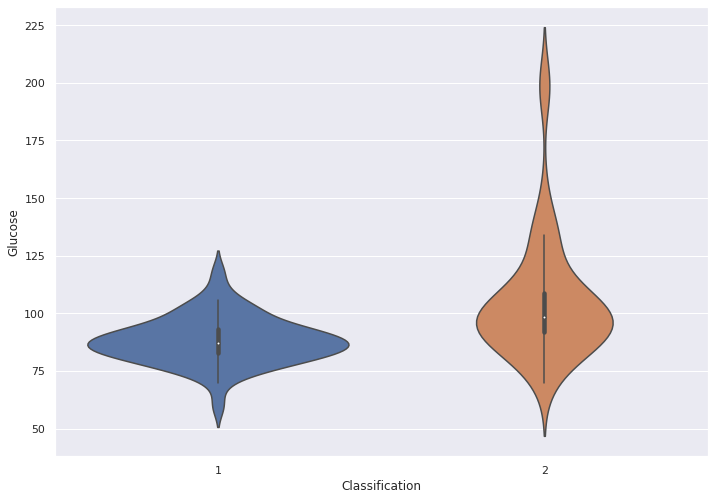

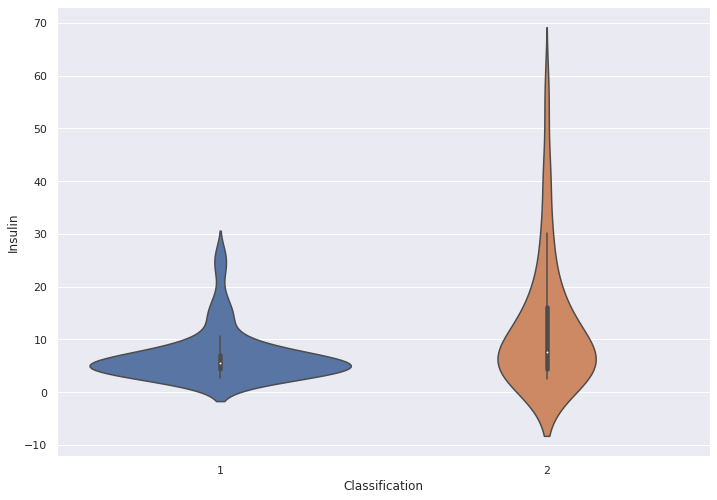

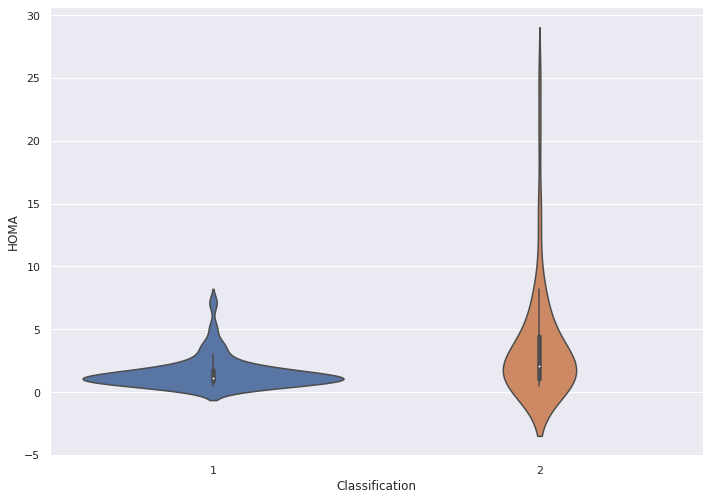

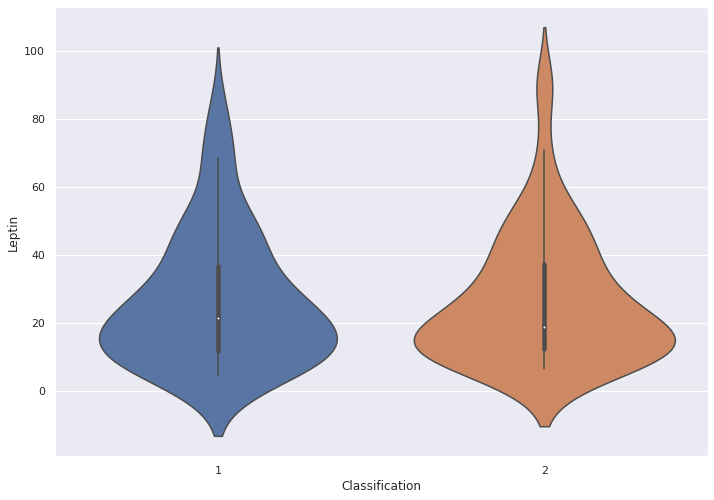

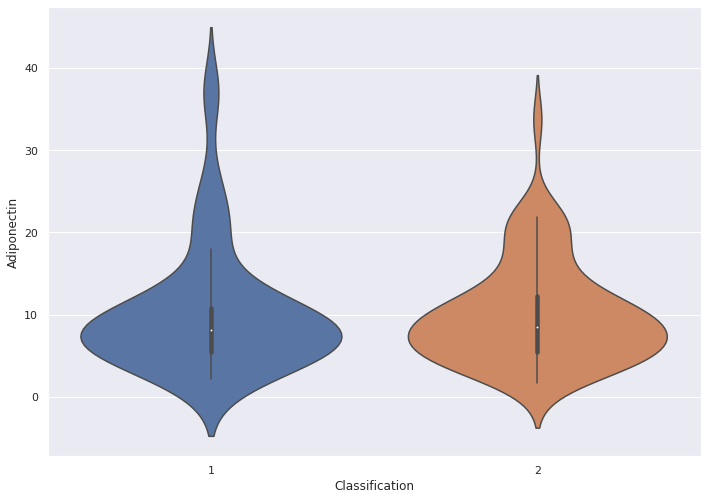

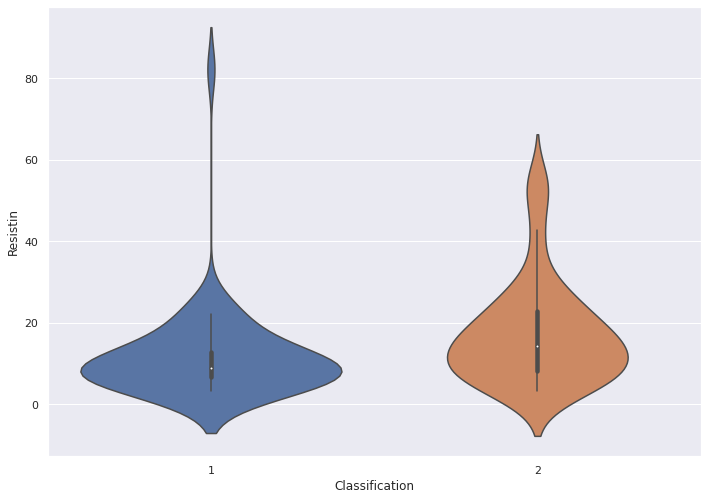

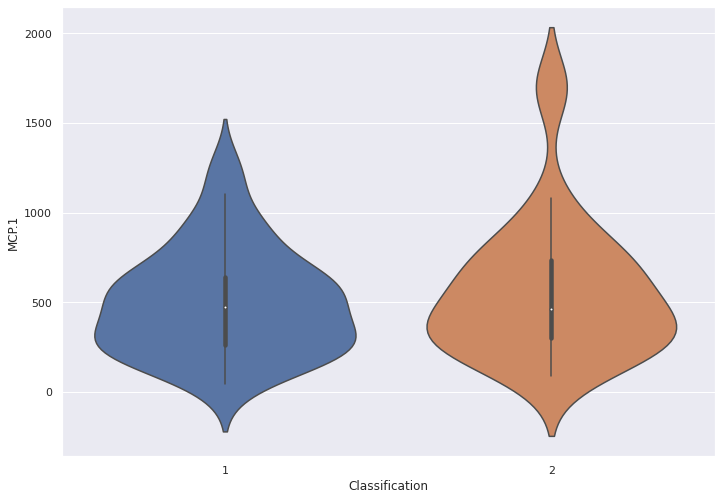

In [23]:
def violin_plots (x, y, data):
  for i, col in enumerate(y):
    plt.figure(i)
    sns.set(rc={"figure.figsize":(11.7,8.27)})
    ax = sns.violinplot(x=x, y=col, data=data)

y = data.columns[:-1]
x = data.columns[-1]

violin_plots(x, y, data)


This is a Python function that creates violin plots using the seaborn library:

  **x is a string** that represents the column name of the independent variable in the dataset.

  **y is a list of strings** that represents the column names of the 
  dependent variables in the dataset.

  **data is a pandas dataframe** that contains the dataset.

function iterates over the columns in y and creates a separate figure for each column. It sets the figure size using sns.set(rc={"figure.figsize":(11.7,8.27)}) and creates a seaborn violin plot using sns.violinplot(x=x, y=col, data=data), where col is the current dependent variable in the iteration. Finally, the function returns the created violin plots.

A violin plot is a type of data visualization that displays the distribution of data by creating a kernel density estimation of the data and displaying it as a shape similar to a violin

In [25]:
for col in data.columns:
  print(f"{col}: {data[col].isnull().sum()}")

Age: 0
BMI: 0
Glucose: 0
Insulin: 0
HOMA: 0
Leptin: 0
Adiponectin: 0
Resistin: 0
MCP.1: 0
Classification: 0


data is a pandas dataframe that contains the dataset.

The code iterates over the columns in the data dataframe using a for loop, and for each column, it prints the column name and the number of missing values in that column using the print function and an f-string. The number of missing values is computed using the isnull() method, which returns a boolean mask indicating whether each value in the column is missing or not, and the sum() method, which sums up the number of missing values in the column.

This code is useful for identifying columns with missing values in a dataset and assessing the extent of missingness for each column.

##Preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


LabelEncoder class from the scikit-learn library to encode a categorical variable in a pandas dataframe:

LabelEncoder is a class from the sklearn.preprocessing module that converts categorical variables into numeric labels.

le is an instance of the LabelEncoder class.

data is a pandas dataframe that contains the dataset.

'Classification' is a string that represents the column name of the categorical variable to be encoded in the data dataframe

The code applies the fit_transform method of the LabelEncoder object to the 'Classification' column of the data dataframe using the le.fit_transform(data['Classification']) statement. This method first fits the encoder to the unique values in the column and then transforms the column by replacing each unique value with a corresponding integer label.

The resulting encoded values are then stored back in the 'Classification' column of the data dataframe using the statement data['Classification'] = le.fit_transform(data['Classification']).



In [28]:
from sklearn.model_selection import train_test_split
y = data['Classification'].values.reshape(-1,1)
X = data.drop(['Classification'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)


**train_test_split** function from the scikit-learn library to split a dataset into training and testing sets:

**train_test_split** is a function from the sklearn.model_selection module that splits a dataset into training and testing sets.

**data** is a pandas dataframe that contains the dataset.

**'Classification'** is a string that represents the column name of the target variable in the data dataframe.

y is a numpy array that contains the values of the target variable, reshaped into a 2D array using the reshape method. This is done to ensure that y has the right shape for use with scikit-learn models.

X is a pandas dataframe that contains the feature variables of the dataset, with the target variable column dropped using the drop method and the axis parameter set to 1 (i.e., column-wise).

test_size is a float that represents the proportion of the dataset to include in the testing set.

random_state is an integer that sets the seed for the random number generator used to split the dataset.

The code splits the dataset into training and testing sets using train_test_split(X, y, test_size = 0.1, random_state=42). It sets the X and y parameters to the feature and target variable arrays, respectively, and sets the test_size parameter to 0.1, indicating that 10% of the data should be used for testing. The resulting training and testing sets are stored in X_train, X_test, y_train, and y_test, respectively.

This code is useful for preparing a dataset for machine learning by splitting it into training and testing sets, which can be used to train and evaluate machine learning models, respectively.


##Baseline Model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


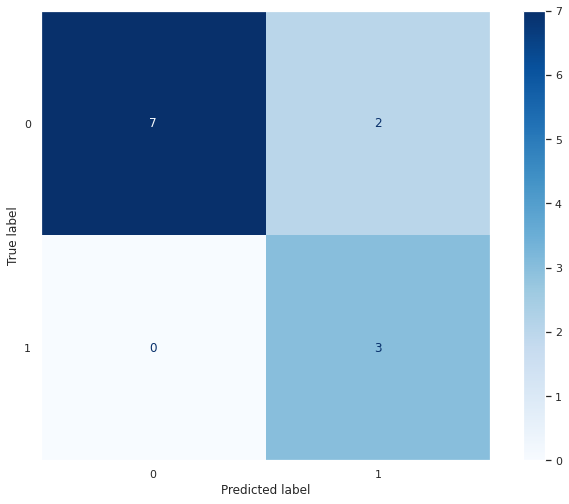

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()



DecisionTreeClassifier class from the scikit-learn library to train a decision tree classifier on a training set and plot its confusion matrix on a testing set:

DecisionTreeClassifier is a class from the sklearn.tree module that implements a decision tree classifier.

clf is an instance of the DecisionTreeClassifier class.

X_train and y_train are numpy arrays that contain the feature and target variable values of the training set, respectively.

X_test and y_test are numpy arrays that contain the feature and target variable values of the testing set, respectively.

plot_confusion_matrix is a function from the sklearn.metrics module that plots a confusion matrix for a classifier on a given dataset.

cmap is a colormap that is used to color the cells of the confusion matrix.

plt.grid(False) turns off the grid lines in the plot

plt.show() displays the plot.

The code trains the decision tree classifier on the training set using clf.fit(X_train, y_train). The resulting trained classifier is then used to predict the target variable values for the testing set using clf.predict(X_test). The plot_confusion_matrix function is then used to plot the confusion matrix for the predicted target variable values and the true target variable values in the testing set.

This code is useful for training and evaluating a decision tree classifier on a dataset, and visualizing its performance using a confusion matrix.

[Text(0.4861111111111111, 0.9285714285714286, 'X[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(0.3055555555555556, 0.7857142857142857, 'X[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3611111111111111, 0.6428571428571429, 'X[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.5, 'X[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.1111111111111111, 0.35714285714285715, 'X[5] <= 26.425\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2777777777777778, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.

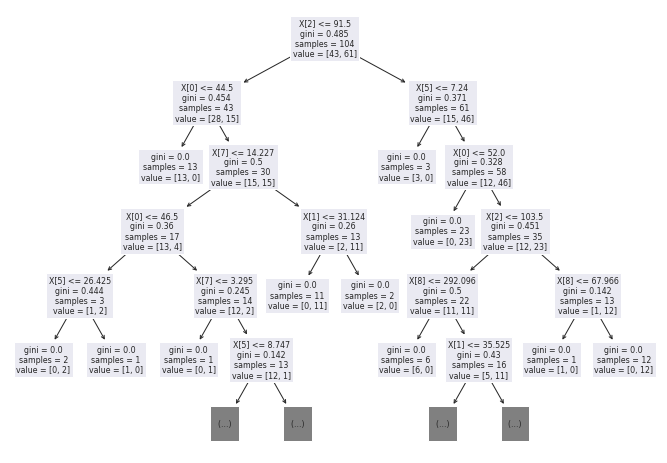

In [30]:
from sklearn.tree import plot_tree
plot_tree(clf, max_depth=5)


plot_tree function from the scikit-learn library to visualize a decision tree classifier:

plot_tree is a function from the sklearn.tree module that plots a decision tree classifier.

clf is an instance of the DecisionTreeClassifier class that has been trained on a dataset.

max_depth is an integer that specifies the maximum depth of the tree to be plotted

The code uses the plot_tree function to plot the decision tree classifier clf using a maximum depth of 5. The resulting plot shows the decision tree, with each node representing a decision based on a feature variable, and each leaf node representing a predicted target variable value. The plot also displays the impurity score and number of samples at each node, as well as the feature variable and threshold used to make the decision at each non-leaf node.

This code is useful for visualizing the decision-making process of a decision tree classifier, and can help to identify patterns and insights in the data that the classifier is using to make its predictions.

##Bagging

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


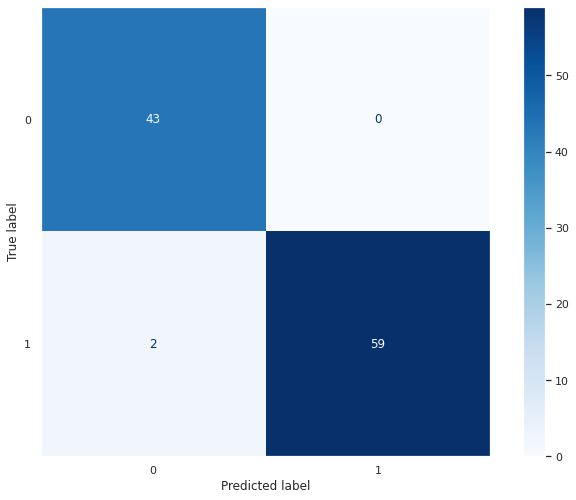

In [33]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train,y_train.ravel())
plot_confusion_matrix(bagging_clf, X_train, y_train, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

BaggingClassifier class from the scikit-learn library to train a bagging classifier on a training set and plot its confusion matrix on the same training set:

BaggingClassifier is a class from the sklearn.ensemble module that implements a bagging classifier

bagging_clf is an instance of the BaggingClassifier class

plot_confusion_matrix is a function from the sklearn.metrics module that plots a confusion matrix for a classifier on a given dataset.

cmap is a colormap that is used to color the cells of the confusion matrix.

plt.grid(False) turns off the grid lines in the plot.

plt.show() displays the plot.

he code trains the bagging classifier on the training set using bagging_clf.fit(X_train, y_train.ravel()). 

The resulting trained classifier is then used to predict the target variable values for the training set using bagging_clf.predict(X_train).

The plot_confusion_matrix function is then used to plot the confusion matrix for the predicted target variable values and the true target variable values in the training set

 This code is useful for evaluating the performance of a bagging classifier on a training set, and visualizing its performance using a confusion matrix. However, it is important to note that using a bagging classifier can lead to overfitting if not properly tuned, so it is recommended to use cross-validation and hyperparameter tuning to ensure optimal performance.


##Random Forest Classifier

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


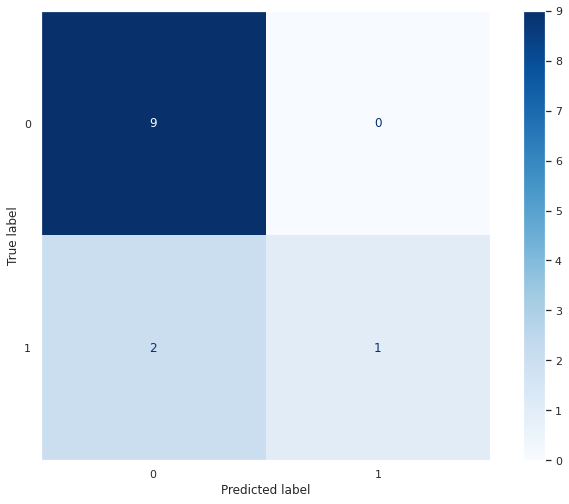

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(100)
random_clf.fit(X_train, y_train.ravel())
plot_confusion_matrix(random_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Using the scikit-learn library to create a random forest classifier, fit it to a training set (X_train and y_train), and then plot a confusion matrix on a test set (X_test and y_test) using the plot_confusion_matrix function.

# Import the RandomForestClassifier class from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier object with 100 trees
random_clf = RandomForestClassifier(100)

# Fit the classifier to the training set
random_clf.fit(X_train, y_train.ravel())

# Plot a confusion matrix using the test set and the trained classifier
plot_confusion_matrix(random_clf, X_test, y_test, cmap=plt.cm.Blues)

# Turn off the grid in the plot
plt.grid(False)

# Show the plot
plt.show()


A random forest classifier is an ensemble learning method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting. Here, we are initializing a RandomForestClassifier object with 100 trees.

The fit method is used to train the random forest classifier on the training set (X_train and y_train). y_train.ravel() is used to convert the target variable y_train from a 2D array to a 1D array to match the shape expected by the classifier.

The plot_confusion_matrix function is used to plot a confusion matrix, which is a table that is often used to describe the performance of a classifier. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, which are the four possible outcomes of a binary classification problem. The cmap=plt.cm.Blues argument sets the color scheme of the confusion matrix.


The plt.grid(False) function is used to turn off the grid in the plot, and plt.show() is used to display the plot.

##Boosting

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


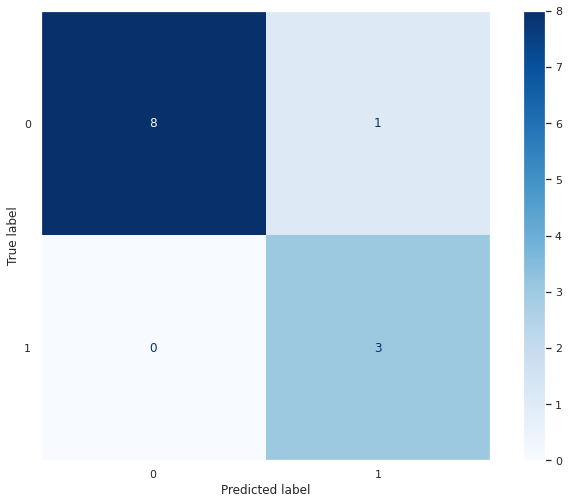

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
boost_clf = GradientBoostingClassifier()
boost_clf.fit(X_train, y_train.ravel())
plot_confusion_matrix(boost_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

using scikit-learn to create a Gradient Boosting Classifier, fit it to a training set (X_train and y_train), and then plot a confusion matrix on a test set (X_test and y_test) using the plot_confusion_matrix function.

-***Import the GradientBoostingClassifier class from scikit-learn's ensemble module***
from sklearn.ensemble import GradientBoostingClassifier

***-Initialize a GradientBoostingClassifier object***
boost_clf = GradientBoostingClassifier()

-***Fit the classifier to the training set***
boost_clf.fit(X_train, y_train.ravel())

-***Plot a confusion matrix using the test set and the trained classifier***
plot_confusion_matrix(boost_clf, X_test, y_test, cmap=plt.cm.Blues)

-***Turn off the grid in the plot***
plt.grid(False)

-**Show the plot**
plt.show()


Gradient boosting is a powerful ensemble learning method that builds a predictive model in a stage-wise fashion, with each new model attempting to correct the errors made by the previous model. Here, we are initializing a GradientBoostingClassifier object with the default hyperparameters.



The fit method is used to train the classifier on the training set (X_train and y_train). y_train.ravel() is used to convert the target variable y_train from a 2D array to a 1D array to match the shape expected by the classifier.

The plot_confusion_matrix function is used to plot a confusion matrix, which is a table that is often used to describe the performance of a classifier. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, which are the four possible outcomes of a binary classification problem. The cmap=plt.cm.Blues argument sets the color scheme of the confusion matrix.

The plt.grid(False) function is used to turn off the grid in the plot, and plt.show() is used to display the plot.